# Exploratory Data Analysis

## Import the libraries and Load the dataset

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/acamillemartin/working_datasets/main/fiveletterwords.csv')

## Exploring the structure of the dataset:

In [32]:
# Check DataFrame shape
print(df.shape)

(2499, 5)


In [30]:
# Check data types
print(df.dtypes)

letter_1    object
letter_2    object
letter_3    object
letter_4    object
letter_5    object
dtype: object


In [31]:
# Check for missing values
print(df.isnull().sum())

letter_1    0
letter_2    0
letter_3    0
letter_4    0
letter_5    0
dtype: int64


In [3]:
#Check the sample dataset
print(df.head())

  letter_1 letter_2 letter_3 letter_4 letter_5
0        a        b        a        c        k
1        a        b        a        s        e
2        a        b        a        t        e
3        a        b        a        y        a
4        a        b        b        e        y


In [4]:
df.describe()

,letter_1,letter_2,letter_3,letter_4,letter_5
count,2499,2499,2499,2499,2499
unique,25,26,25,26,23
top,c,o,a,e,s
freq,410,385,298,510,729


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   letter_1  2499 non-null   object
 1   letter_2  2499 non-null   object
 2   letter_3  2499 non-null   object
 3   letter_4  2499 non-null   object
 4   letter_5  2499 non-null   object
dtypes: object(5)
memory usage: 97.7+ KB


### Q1: What is the probability that the first letter is a vowel, given no other information?

In [12]:
# Calculate the total number of words in the dataset
total_words = len(df)

# Filter the DataFrame to include only words where the first letter is a vowel ('a', 'e', 'i', 'o', 'u')
vowel_starts = df[df['letter_1'].isin(['a', 'e', 'i', 'o', 'u'])]

# Calculate the probability that the first letter is a vowel by dividing the count of words where the first letter is a vowel by the total number of words
probability_first_vowel = len(vowel_starts) / total_words

# Print the probability
print('Probability that the first letter is a vowel:', probability_first_vowel)

Probability that the first letter is a vowel: 0.16606642657062826


In [11]:
# Calculate the total number of words in the dataset
total_words = len(df)

# Calculate the total number of words where the first letter is a vowel
total_vowels = sum(df['letter_1'].isin(['a', 'e', 'i', 'o', 'u']))

# Calculate the probability that the first letter is a vowel given no other information
probability_first_vowel = total_vowels / total_words

# Print the probability
print('Probability that the first letter is a vowel, given no other information:', probability_first_vowel)

Probability that the first letter is a vowel, given no other information: 0.16606642657062826


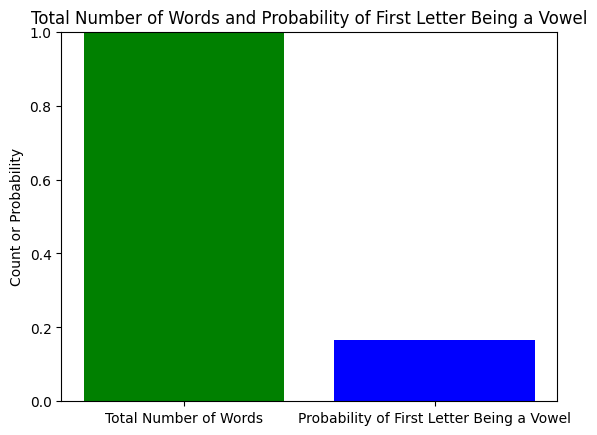

In [14]:
# Define labels and values for the bar plot
labels = ['Total Number of Words', 'Probability of First Letter Being a Vowel']
values = [total_words, probability_first_vowel]

# Create a bar plot
plt.bar(labels, values, color=['green', 'blue'])

# Add title and axis labels
plt.title('Total Number of Words and Probability of First Letter Being a Vowel')
plt.ylabel('Count or Probability')

# Set y-axis limits to ensure correct visualization of probability (between 0 and 1)
plt.ylim(0, 1)

# Show the plot
plt.show()

### Q2: What is the probability that the first and last letter will be the same?

In [15]:
# Filter the dataset to include only five-letter words where the first and last letter are the same
first_last_same = []
for index, row in df.iterrows():
    if row['letter_1'] == row['letter_5']:
        first_last_same.append(row)

# Convert the list of matching rows to a DataFrame
five_letter_words = pd.DataFrame(first_last_same)

# Calculate the probability
probability_first_last_same = len(five_letter_words) / len(df)a

print('Probability that the first and last letter are the same:', probability_first_last_same)

Probability that the first and last letter are the same: 0.05002000800320128


In [16]:
# Filter the DataFrame to include only rows where the first letter is the same as the last letter
same_first_last = df[df['letter_1'] == df['letter_5']]

# Calculate the probability that the first and last letter are the same by dividing the count of matching rows by the total number of words
probability_same_first_last = len(same_first_last) / total_words

# Print the probability
print('Probability that the first and last letter are the same:', probability_same_first_last)

Probability that the first and last letter are the same: 0.05002000800320128


### Q3: Assume you’re in the middle of the game, and all you have so far is that A in the 2nd position is YELLOW. What position is A most likely to be in, given no other information?

In [18]:
# Initialize probabilities for each position
probabilities = [1/6] * 6

# Given that A in the 2nd position is YELLOW
# Update probabilities based on this information
probabilities[1] = 1
probabilities[0] = 0
probabilities[2] = 0
probabilities[3:] = [1/5] * 3

# Normalize probabilities
total_probability = sum(probabilities)
normalized_probabilities = [prob / total_probability for prob in probabilities]

# Print probabilities
for i, prob in enumerate(normalized_probabilities):
    print(f"Probability of A being in position {i+1}: {prob:.4f}")

Probability of A being in position 1: 0.0000
Probability of A being in position 2: 0.6250
Probability of A being in position 3: 0.0000
Probability of A being in position 4: 0.1250
Probability of A being in position 5: 0.1250
Probability of A being in position 6: 0.1250


### Q4: Assume the first letter is a vowel. What is the probability that the second letter is a consonant?

In [9]:
# Calculate the probability that the second letter is a consonant given the first letter is a vowel
vowel_second_consonant = vowel_starts[df['letter_2'].apply(lambda x: x not in ['a', 'e', 'i', 'o', 'u'])]
probability_second_consonant_given_first_vowel = len(vowel_second_consonant) / len(vowel_starts)
print('Probability that the second letter is a consonant given the first letter is a vowel:', probability_second_consonant_given_first_vowel)

Probability that the second letter is a consonant given the first letter is a vowel: 0.8819277108433735


<ipython-input-9-4d467e409801>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vowel_second_consonant = vowel_starts[df['letter_2'].apply(lambda x: x not in ['a', 'e', 'i', 'o', 'u'])]


In [20]:
# Define a function to check if a letter is a consonant
def is_consonant(letter):
    return letter not in ['a', 'e', 'i', 'o', 'u']

# Filter words from df where the first letter is a vowel
vowel_starts = df[df['letter_1'].apply(lambda x: x in ['a', 'e', 'i', 'o', 'u'])]

# Filter words from vowel_starts where the second letter is a consonant
vowel_second_consonant = vowel_starts[df['letter_2'].apply(is_consonant)]

# Calculate the probability that the second letter is a consonant given the first letter is a vowel
# Probability = Number of words where second letter is a consonant / Total number of words starting with a vowel
probability_second_consonant_given_first_vowel = len(vowel_second_consonant) / len(vowel_starts)

# Print the calculated probability
print('Probability that the second letter is a consonant given the first letter is a vowel:', probability_second_consonant_given_first_vowel)

Probability that the second letter is a consonant given the first letter is a vowel: 0.8819277108433735


<ipython-input-20-9de8fe145e27>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vowel_second_consonant = vowel_starts[df['letter_2'].apply(is_consonant)]


In [23]:
# Data Summary
print("Data Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())

Data Shape: (2499, 5)

First few rows:
  letter_1 letter_2 letter_3 letter_4 letter_5
0        a        b        a        c        k
1        a        b        a        s        e
2        a        b        a        t        e
3        a        b        a        y        a
4        a        b        b        e        y

Missing Values:
letter_1    0
letter_2    0
letter_3    0
letter_4    0
letter_5    0
dtype: int64


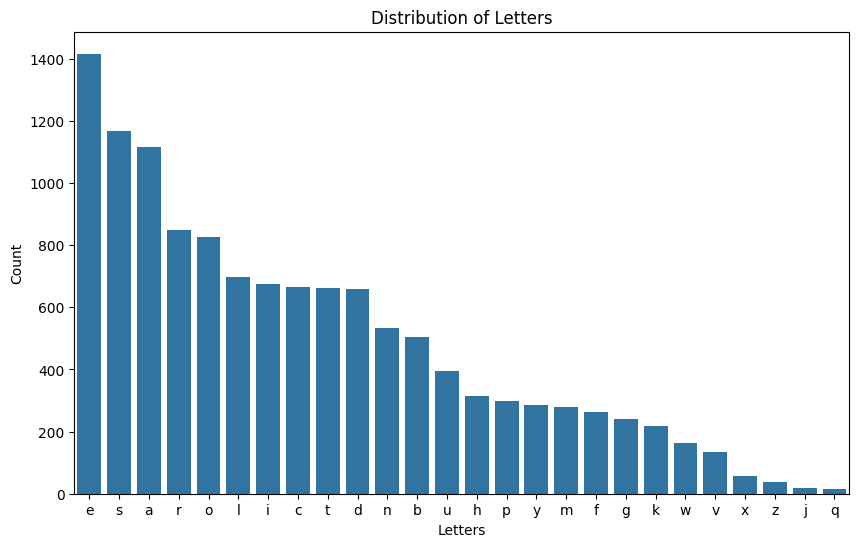

In [26]:
# Distribution of Letters
plt.figure(figsize=(10, 6))
sns.countplot(data=df.melt(), x='value', order=df.melt()['value'].value_counts().index)
plt.title('Distribution of Letters')
plt.xlabel('Letters')
plt.ylabel('Count')
plt.show()

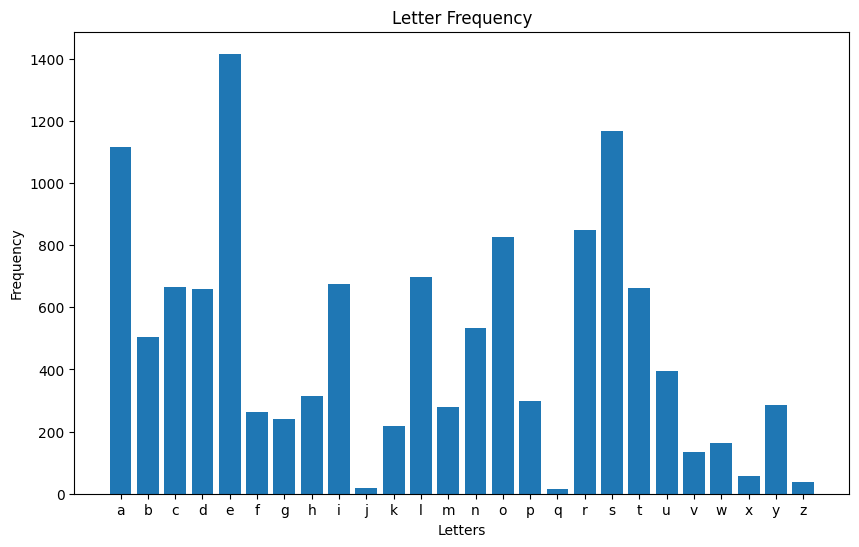

In [27]:
# Letter Frequency
letter_freq = df.melt().groupby('value').size().reset_index(name='frequency')
plt.figure(figsize=(10, 6))
plt.bar(letter_freq['value'], letter_freq['frequency'])
plt.title('Letter Frequency')
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.show()